# **_Linear Regression_**

In [1]:
from codecs import make_encoding_map

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(42)

num_samples = 500

years_of_experience = np.random.randint(2, 21, size=num_samples)

slope = (200_000 - 60_000) / 18
intercept = 60_000

salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000)
# np.random.normal(0, 10000) adds realistic random variation with zero average and a spread of 10,000 to simulate real-world noise in data

In [4]:
data = {'years_of_experience': years_of_experience, 'salary': salaries}

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,years_of_experience,salary
0,8,115037.780010
1,16,177260.002232
2,12,146148.891121
3,9,122815.557787
4,8,115037.780010


In [7]:
df.describe()

,years_of_experience,salary
count,500.000000,500.000000
mean,10.616000,135384.446676
std,5.662922,44044.945994
min,2.000000,68371.113343
25%,5.750000,97537.780010
50%,10.000000,130593.335565
75%,16.000000,177260.002232
max,20.000000,208371.113343


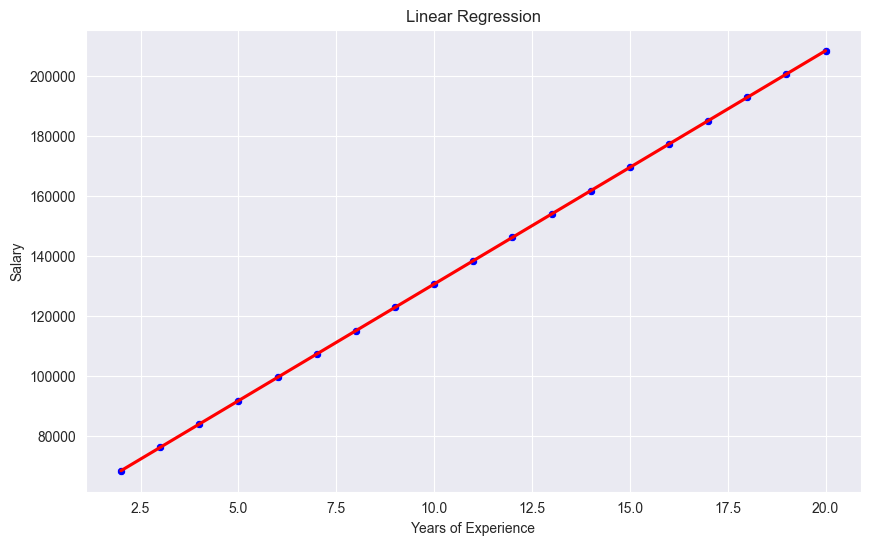

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_of_experience', y='salary', color='blue')
sns.regplot(data=df, x='years_of_experience', y='salary', color='red', scatter=False)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression')

plt.show()

In [9]:
X = df[['years_of_experience']]

In [10]:
y = df[['salary']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
lr.score(X_train, y_train)

1.0

In [16]:
lr.score(X_test, y_test)

1.0

# **_Evaluation metrics_**

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
y_pred = lr.predict(X_test)

### **_Mean Absolute Error_**

In [25]:
mae = mean_absolute_error(y_test, y_pred)

In [26]:
print(f"{mae:.11f}")

0.00000000004


### **_Mean Squared Error_**

In [31]:
mse = mean_squared_error(y_test, y_pred)

In [32]:
print(f"{mse:.21f}")

0.000000000000000000002


### **_R² Score_**

In [33]:
r2_score(y_test, y_pred)

1.0

In [34]:
lr.coef_

array([[7777.77777778]])

In [35]:
lr.intercept_

array([52815.55778748])

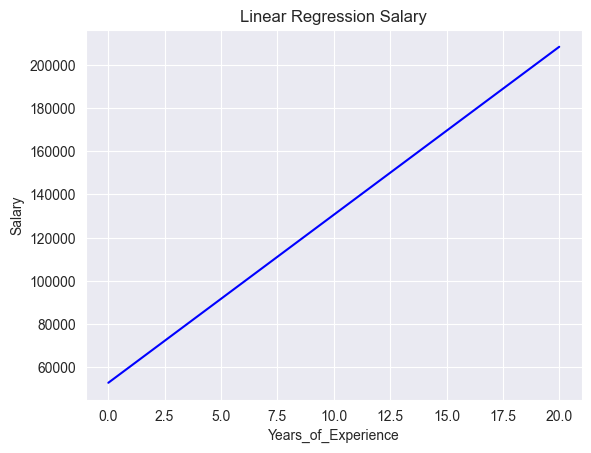

In [36]:
coefficients = lr.coef_.ravel()[0]
intercept = lr.intercept_[0]

X = np.linspace(0, 20, 100)
y = coefficients * X + intercept

plt.plot(X, y, label=f'y = {coefficients}x + {intercept}', color='blue')

plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Salary')

plt.grid(True)
plt.show()